# Laboratorium 6 - MOwNiT2

Zadanie zajęć z dr Malawskim.
<br> https://github.com/kzajac/Mownit2018/blob/master/Mownit-Lab5.ipynb
<br> (seria 5: https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/)

In [52]:
import Pkg

Pkg.add("Plots")
Pkg.add("Polynomials")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Interpolations")

using Plots
using Polynomials
using Statistics
using DataFrames
using Interpolations

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


## Interpolacja

Wybór przykładowych węzłów interpolacyjnch.

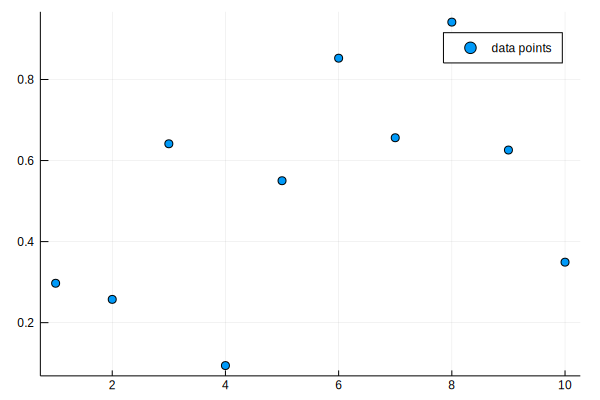

In [53]:
xs =  1:1:10
A = [rand() for x in xs]

xsf=1:0.01:10
scatter(xs, A, label="data points")

### Zadanie 1.
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

$L_k(x) = \prod_{i=0, i \neq k}^{n} \frac{x - x_i}{x_k - x_i} \qquad
P_n(x) = \sum_{k=0}^{n} L_k(x)f(x_k) $

In [54]:
function lagrange_interpolation(xs, A)
    n = size(A,1)
    P = Poly([0])
    for k = 1:n
        l = Poly([1.0])
        for i = 1:n
            if i != k
                l *= poly([xs[i]]) / (xs[k] - xs[i])
            end
        end
        P += (l * A[k])
    end
    return P
end

lagrange_interpolation (generic function with 1 method)

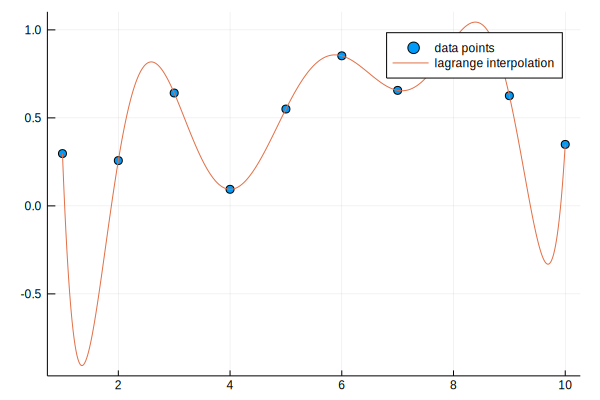

In [55]:
fit_lagrange = lagrange_interpolation(xs, A)
B = [fit_lagrange(x) for x in xsf]
plot!(xsf, B, label="lagrange interpolation")

### Zadanie 2.
Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

$P_n(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + ... + a_n(x - x_0) \cdots (x - x_{n-1})$

In [56]:
function newton_interpolation(xs, A, n)
    if n == 1
        Poly(float(A[1]))
    else
        newton_rec = newton_interpolation(xs, A, n-1)
        p = A[n] - polyval(newton_rec, xs[n])
        q = 1
        for i = 1:n-1
            q *= (xs[n] - xs[i])
        end
        poly([xs[i] for i in 1:n-1]) * (p / q) + newton_rec
    end
end 

newton_interpolation (generic function with 1 method)

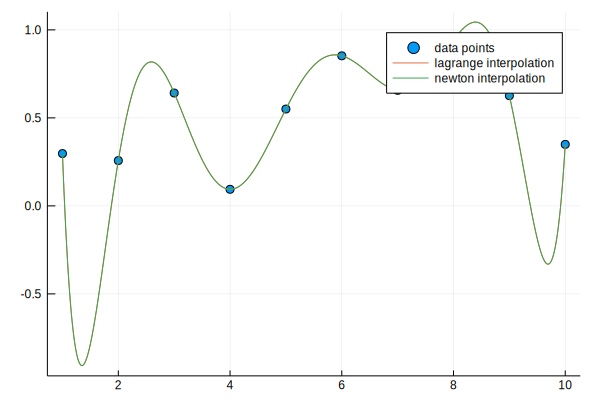

In [57]:
fit_newton = newton_interpolation(xs, A, n)
C = [fit_newton(x) for x in xsf]
plot!(xsf, C, label="newton interpolation")

### Zadanie 3.
Zastosowac interpolację wielomianową z pakietu Polynomials (jesli wybralismy Julie) albo z funkcji gsl_interp_polynomial z pakietu GSL (jesli wybraliśmy C) do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

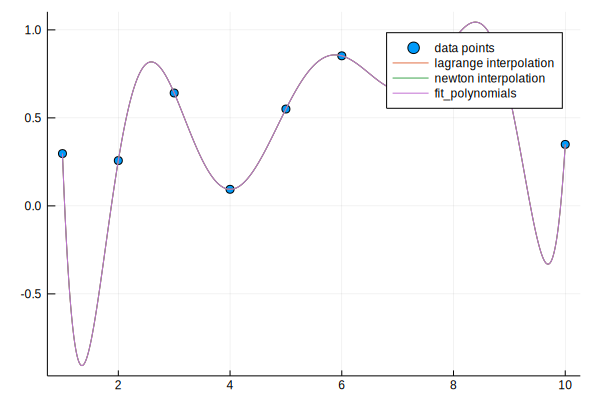

In [58]:
fit_polynomials = polyfit(xs, A)
D = [fit_polynomials(x) for x in xsf]
plot!(xsf, D, label="fit_polynomials")

### Zadanie 4.
Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego. Narzedzie do analizy danych do wyboru (Julia, R).

In [35]:
df = DataFrame(size = Int[], version = String[], time = Float64[])

trials = 10;
iterations = 10;
steps = 100;

In [36]:
for i in steps:steps:steps*iterations
    x = 0:1:i
    for j = 1:trials
        y = rand(Int, i+1)

        t = @elapsed lagrange_interpolation(x, y)
        push!(df, [i, "lagrange", t])

        t = @elapsed newton_interpolation(x, y, i)
        push!(df, [i, "newton", t])

        t = @elapsed polyfit(x, y)
        push!(df, [i, "polyfit", t])
    end
end

In [43]:
df_with_mean_and_std = by(df, [1,2]) do grouped
    DataFrame(time_mean = mean(grouped[3]), time_std = std(grouped[3]))
end

,size,version,time_mean,time_std
,Int64,String,Float64,Float64
1,100,lagrange,0.0304767,0.0479084
2,100,newton,0.00875265,0.0262589
3,100,polyfit,0.14822,0.468028
4,200,lagrange,0.0679206,0.0102622
5,200,newton,0.0022423,8.97913e-5
6,200,polyfit,0.00115986,0.00116507
7,300,lagrange,0.225507,0.0494219
8,300,newton,0.00871145,0.00134391
9,300,polyfit,0.00306121,0.00147596


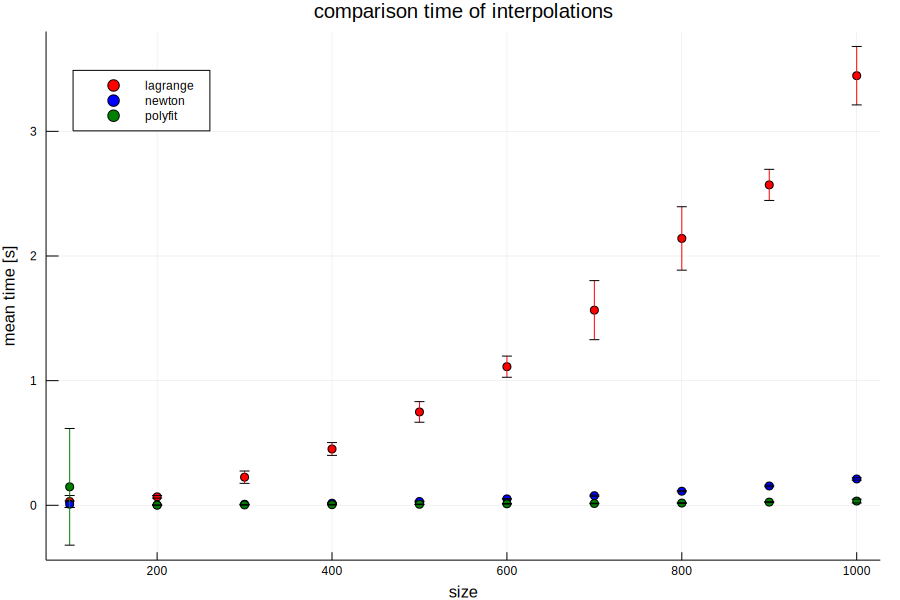

In [44]:
plot2 = scatter(df_with_mean_and_std[:size], df_with_mean_and_std[:time_mean],
    group = df_with_mean_and_std[:version],
    yerr = df_with_mean_and_std[:time_std],
    size = (900, 600), layout = 1,
    color = [:red :blue :green], legend = :topleft,
    xlabel = "size", ylabel = "mean time [s]",
    title = "comparison time of interpolations"
)

### Zadanie 5.
Poeksperymentowac z interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane), narysowac wykresy i porownac z wykresami interpolacji wielomianowej.

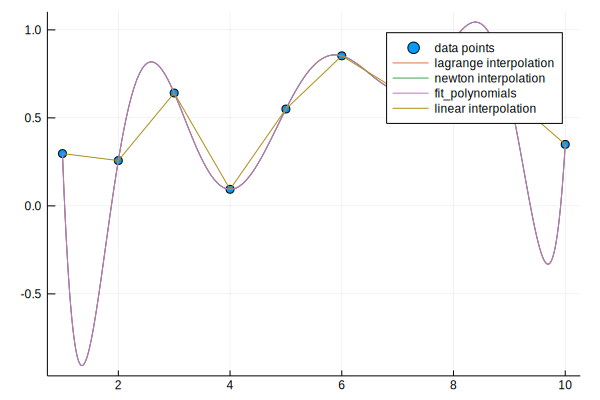

In [59]:
interp_linear = LinearInterpolation(xs, A)
E = [interp_linear(x) for x in xsf]
plot!(xsf, E, label="linear interpolation")

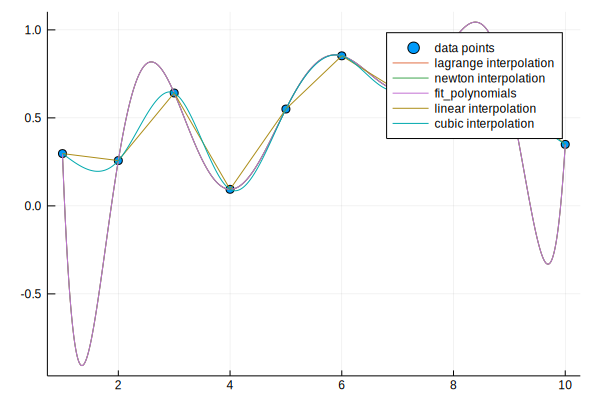

In [60]:
interp_cubic = CubicSplineInterpolation(xs, A)
E = [interp_cubic(x) for x in xsf]
plot!(xsf, E, label="cubic interpolation")

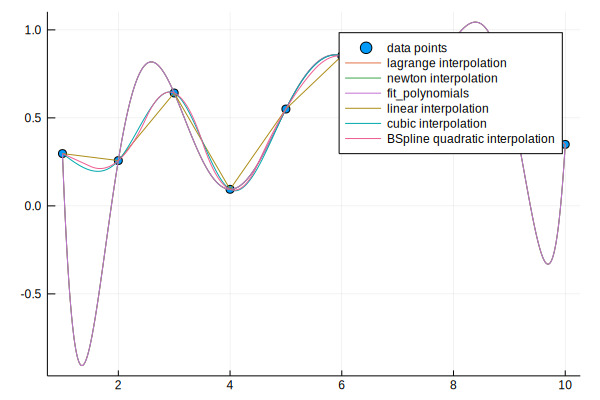

In [61]:
iterp_bspline = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
F=[iterp_bspline(x) for x in xsf]
plot!(xsf, F, label="BSpline quadratic interpolation")

### Zadanie 6.
Zademonstrowac efekt Rungego.

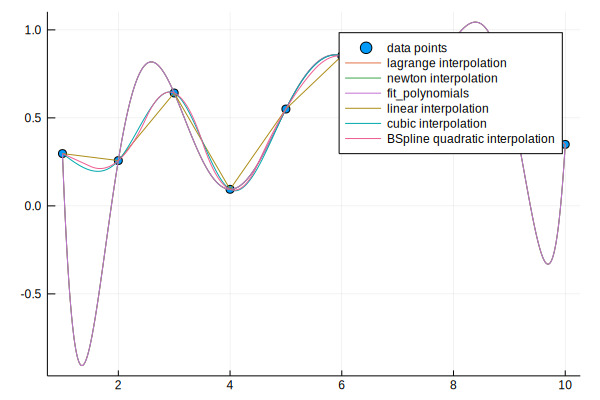

In [62]:
plot!()

Na powyższym wykresie widać, że na końcach przeciału fukcja interpolująca lagrange, newtona oraz z biblioteki polynomials, wyskakują w dół.